22:06:52 - cmdstanpy - INFO - Chain [1] start processing
22:06:53 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\thisi\.julia\conda\3\x86_64\lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\thisi\.julia\conda\3\x86_64\lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


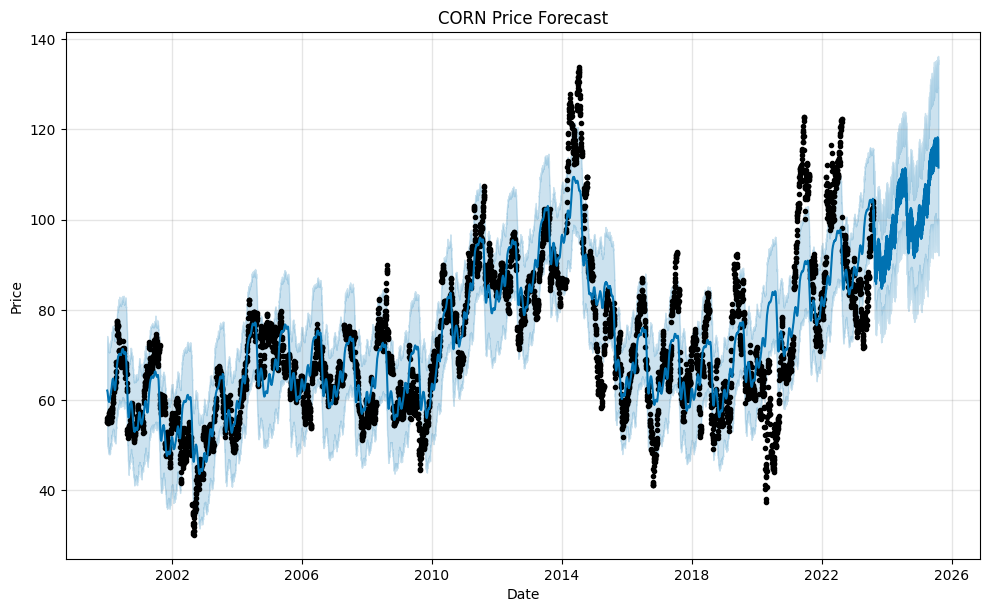

In [18]:
import pandas as pd
from prophet import Prophet

# Load the dataset
df = pd.read_csv(r'C:\Users\thisi\Desktop\MSO forecast\livestock_commodity.csv', parse_dates=['Date'], index_col='Date')

# Choose the commodity to forecast
commodity = 'LEAN.HOGS'  # Change this to the commodity you want to forecast
df = df[[commodity]]
df = df.reset_index()

# Rename the columns to fit Prophet's expected column names
df.rename(columns={'Date': 'ds', commodity: 'y'}, inplace=True)

# Initialize the Prophet model
model = Prophet()

# Fit the model
model.fit(df)

# Make a future dataframe for 2 years (730 days)
future = model.make_future_dataframe(periods=730)

# Forecast the future values
forecast = model.predict(future)

# Extract the relevant columns
forecasted_dates = forecast['ds']
forecasted_prices = forecast['yhat']

# Create a DataFrame for future predictions
future_df = forecast[forecast['ds'] > df['ds'].max()]
forecasted_dates = future_df['ds']
forecasted_prices = future_df['yhat']

# Create a new DataFrame with the forecasted dates and prices
forecasted_df = pd.DataFrame({'Forecasted Date': forecasted_dates, 'Forecasted Prices': forecasted_prices})

# Save the DataFrame to a CSV file
forecasted_df.to_csv(r'C:\Users\thisi\Desktop\MSO forecast\forecasted_prices.csv', index=False)

# Optionally, plot the forecast
fig = model.plot(forecast)
plt.title('CORN Price Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()



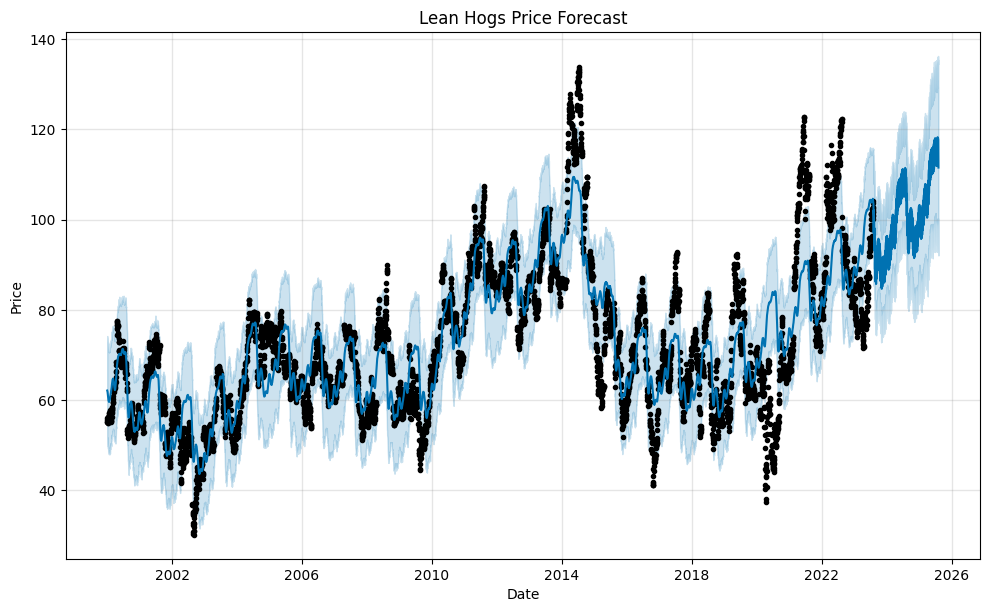

In [19]:
fig = model.plot(forecast)
plt.title('Lean Hogs Price Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()